# Load the Dataset

In [149]:
import pandas as pd

df=pd.read_csv("./admission_data.csv")
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# Data Preprocessing

## Data cleaning

### Incomplete data

In [150]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Noisy values

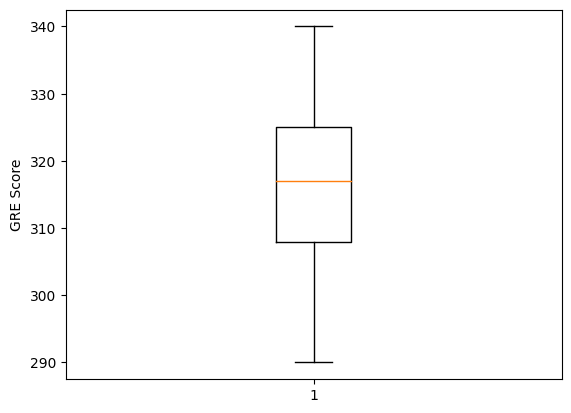

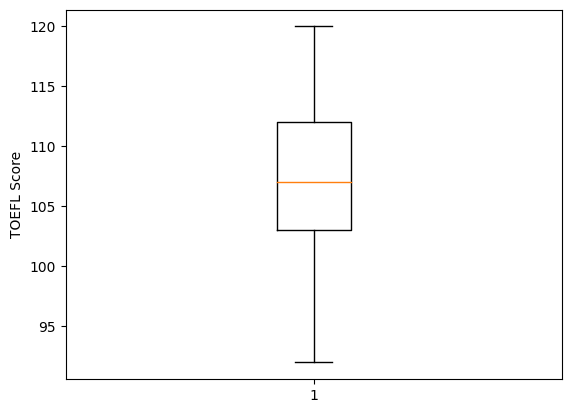

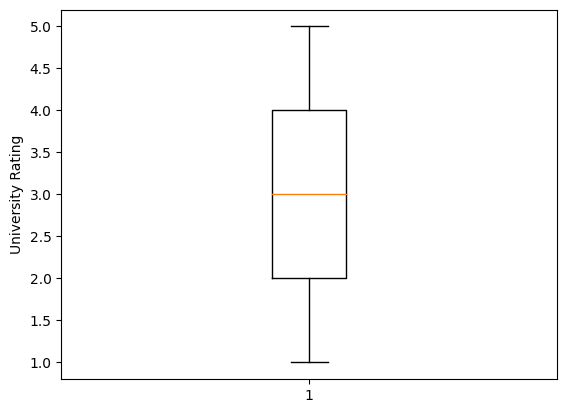

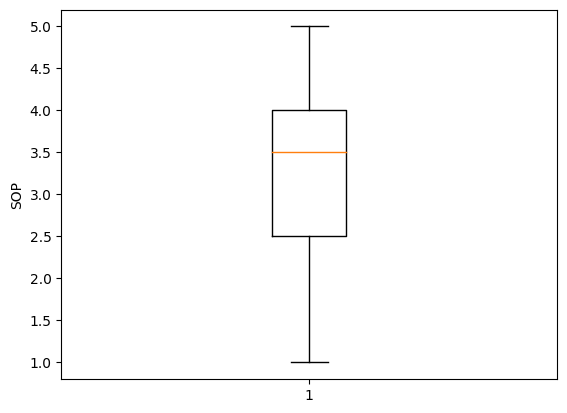

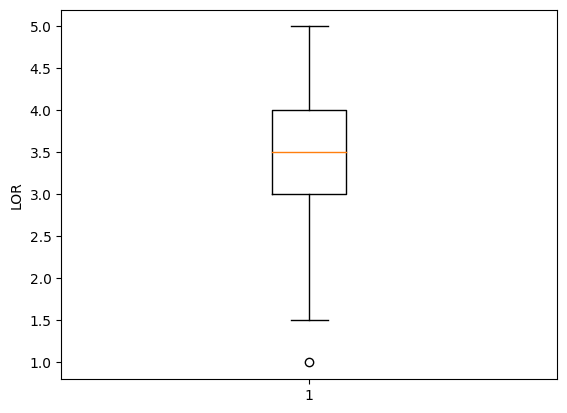

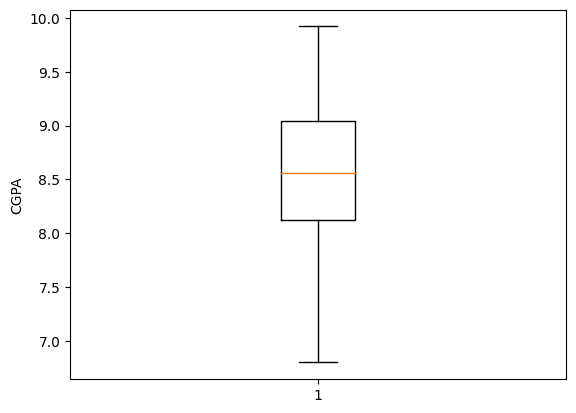

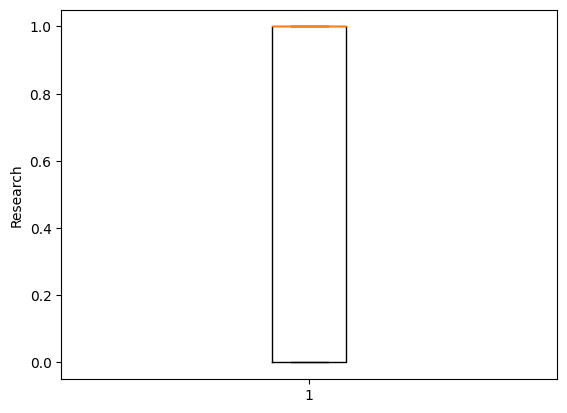

In [151]:
import matplotlib.pyplot as plt

def print_noisy_val_graphs():
    for column_name in df.columns:
        if column_name!='Chance of Admit':
            plt.boxplot(df[column_name])
            plt.ylabel(column_name)
            plt.show()

print_noisy_val_graphs()

##### LOR & Chance rate each have just one outlier. No need to perform data smoothening.

## Data Transformation

### Normalization

In [152]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [153]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
dfstd=ss.fit_transform(df)
df_normalized=df.iloc[:, :].copy()
df_normalized['GRE Score']=dfstd[:, 0]
df_normalized['TOEFL Score']=dfstd[:, 1]
df_normalized['University Rating']=dfstd[:, 2]
df_normalized['SOP']=dfstd[:, 3]
df_normalized['LOR']=dfstd[:, 4]
df_normalized['CGPA']=dfstd[:, 5]
df_normalized

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,1,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,1,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,1,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,1,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,0,0.65
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,1,0.87
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,1,0.96
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,1,0.93
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,0,0.73


## Data Reduction

### Low variance filter

In [154]:
df_normalized.var()


GRE Score            1.002004
TOEFL Score          1.002004
University Rating    1.002004
SOP                  1.002004
LOR                  1.002004
CGPA                 1.002004
Research             0.246894
Chance of Admit      0.019921
dtype: float64

##### Variance of normalized columns are of the same order. No features removed.

### High correlation filter

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

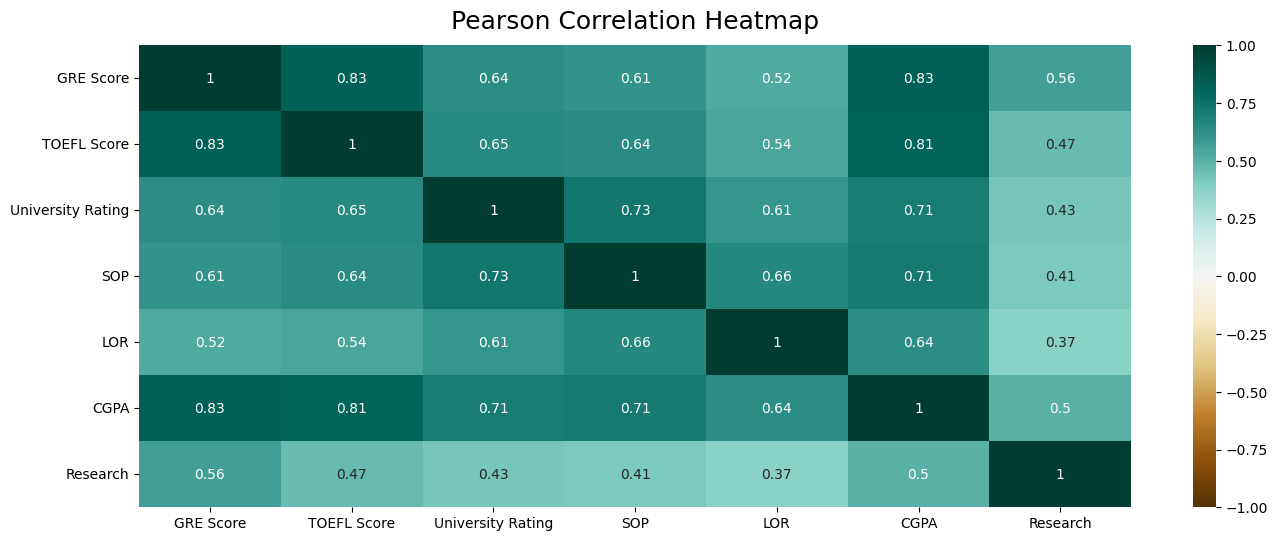

In [155]:
import seaborn as sns
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df_normalized.iloc[:,0:7].corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap',fontdict={'fontsize':18},pad=12)

##### TOEFL Score and CGPA have high correlation with other features (>0.8) but as they are crucial to the process of admission, the features are not removed.

## Data Visualization

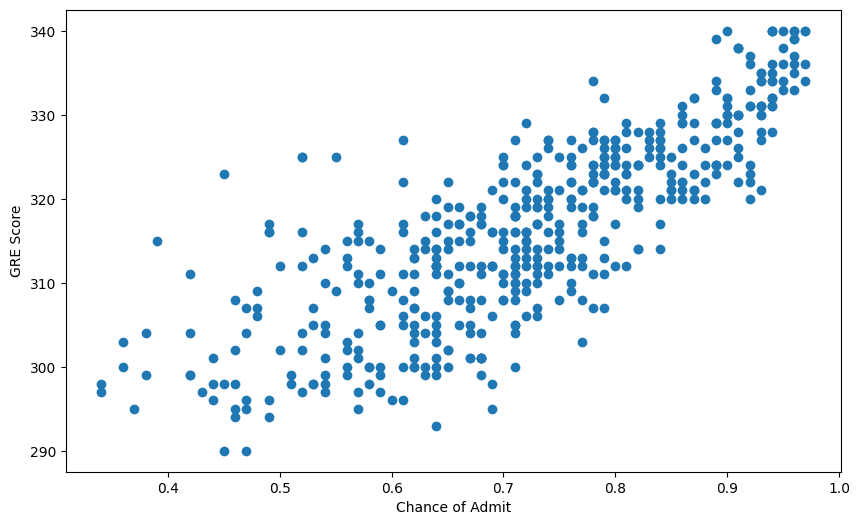

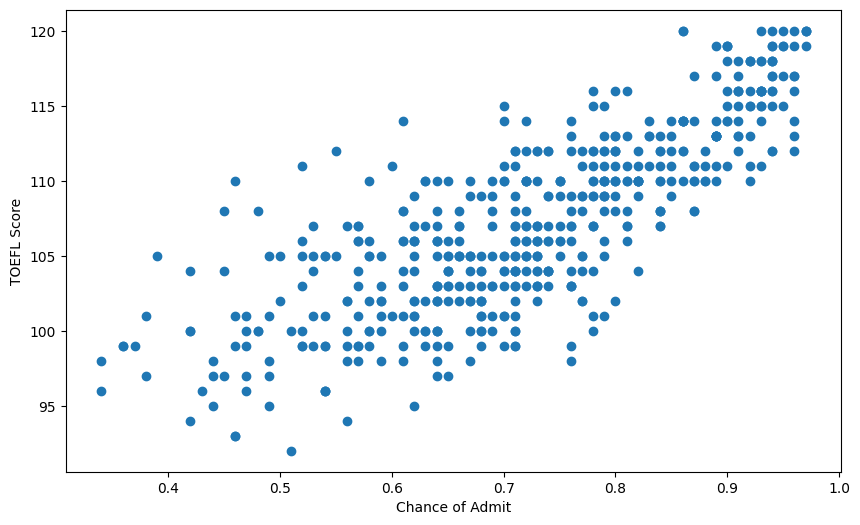

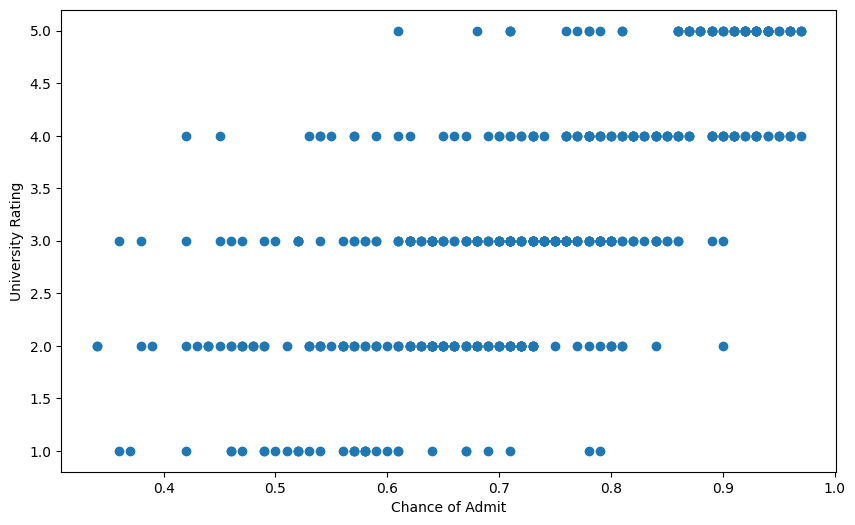

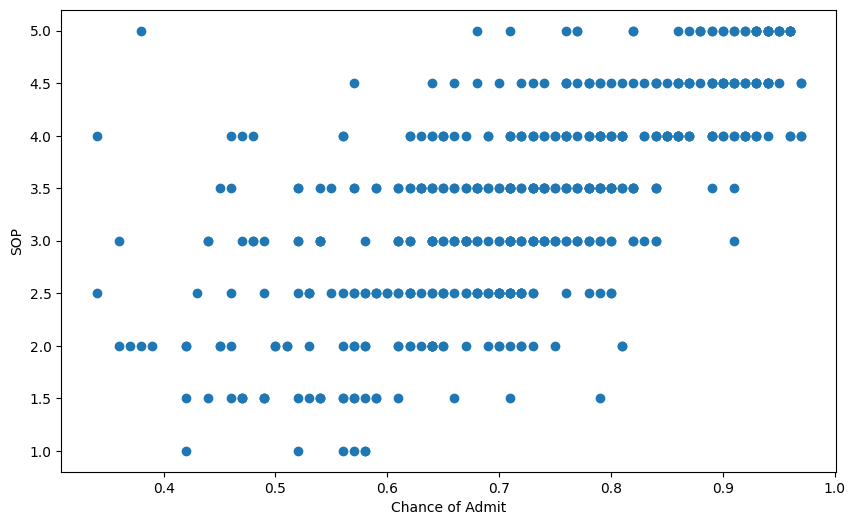

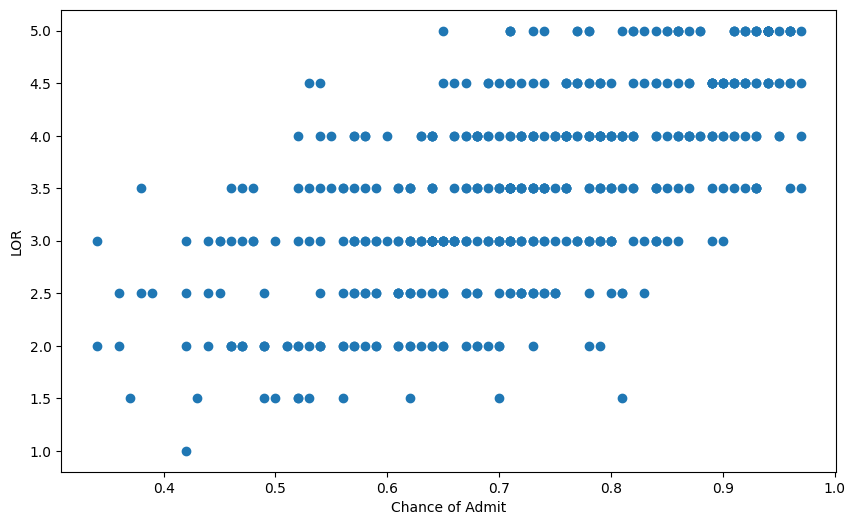

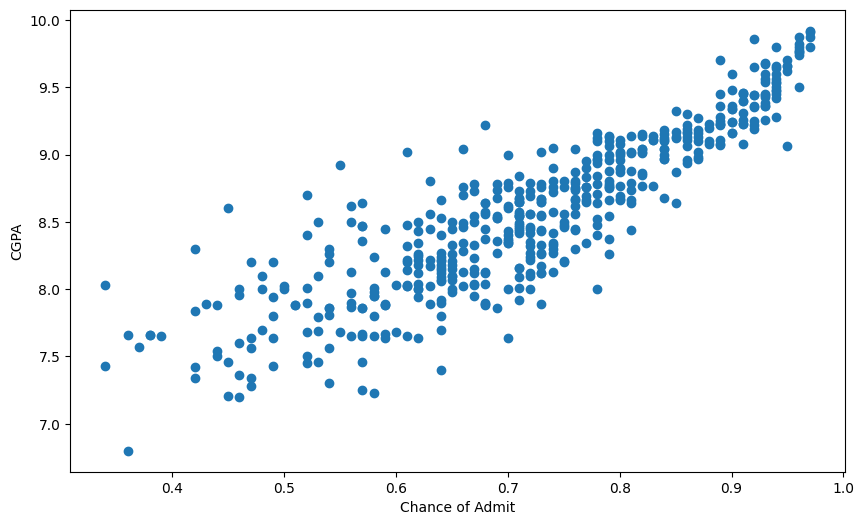

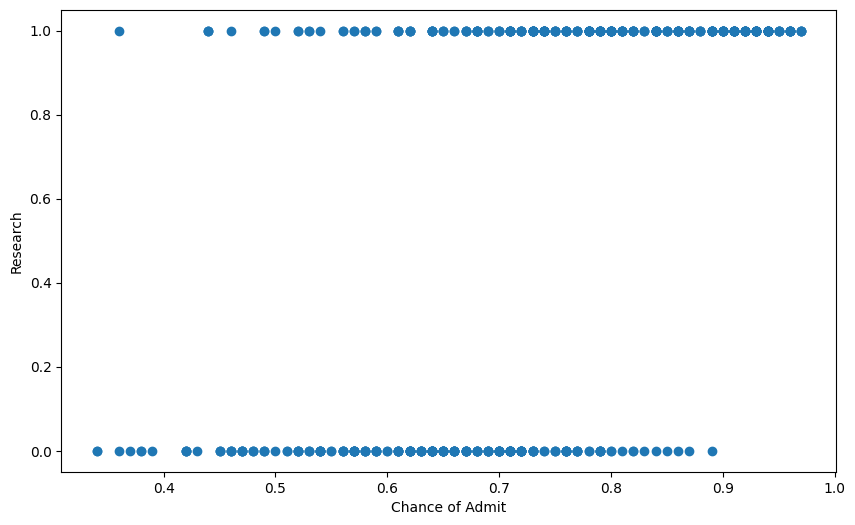

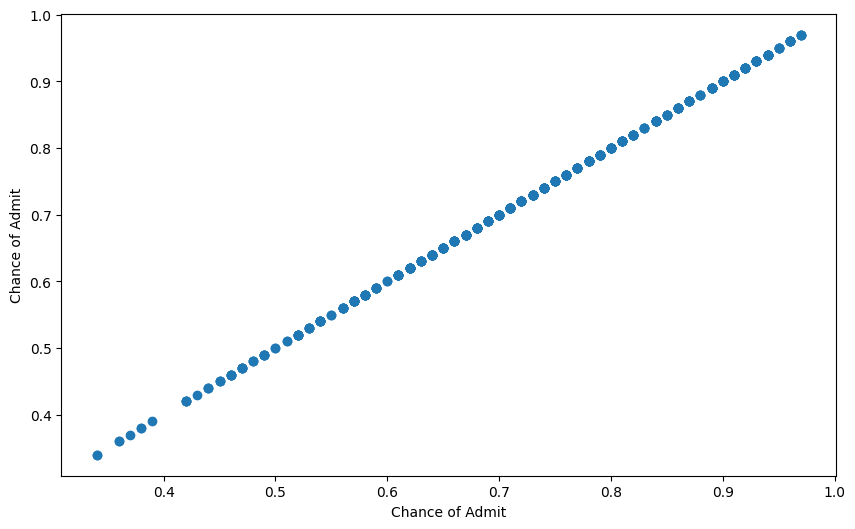

In [156]:
for col in df.columns:
  plt.figure(figsize=(10, 6))
  if col!='Chance of Admit ':
    plt.scatter(df['Chance of Admit'], df[col])
    plt.ylabel(col)
    plt.xlabel('Chance of Admit')
    plt.show()
    print("\n")

#

## Separate X & Y

In [157]:
n, m=df.shape
X=df.iloc[:, 0:m-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [158]:
Y=df.iloc[:, m-1]
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

# Train the model

## Least Squares Error Fit

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

def LeastSquaresError(input=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

    #Prepend X_test with a column of 1s
    no_of_rows, no_of_columns=X_test.shape
    X_ones=np.ones((no_of_rows, 1))
    X_test_with_ones=np.hstack((X_ones, X_test))


    #Prepend X_train with a column of 1s
    no_of_rows, no_of_columns=X_train.shape
    X_ones=np.ones((no_of_rows, 1))
    X_train_with_ones=np.hstack((X_ones, X_train))

    #Least Squares Method
    X_transpose=np.transpose(X_train_with_ones)
    X_transpose_X=np.matmul(X_transpose,X_train_with_ones)
    X_transpose_X_inverse=np.linalg.inv(X_transpose_X)
    X_transpose_X_inverse_X=np.matmul( X_transpose_X_inverse, X_transpose)
    B=np.matmul( X_transpose_X_inverse_X,Y_train)

    
    Y_predicted=np.matmul(X_test_with_ones,B)

    square_error=(Y_test-Y_predicted)*(Y_test-Y_predicted)
    costfunc=np.sum(square_error)
    #print(f"Cost={costfunc}")
    global r2_least_sq
    r2_least_sq=r2_score(Y_test,Y_predicted)

    #Prepend X with a column of 1s
    no_of_rows, no_of_columns=X.shape
    X_ones=np.ones((no_of_rows, 1))
    X_with_ones=np.hstack((X_ones, X))
    Y_predicted=np.matmul(X_with_ones,B)


    if input==0:
        
        print(f"R2 score of Least Squares Regression={r2_least_sq}")
        plt.figure(figsize=(24, 12))
        x=list(range(1, len(Y)+1))
        plt.plot(x, Y, label="Actual")
        plt.plot(x, Y_predicted, label="Predicted", color="orange")
        plt.title("Least Squares Regression")
        plt.legend()
        plt.show()
        return B


    input=np.hstack((1, input))
    output=np.matmul(input, B)
    return B, output

## K-fold Cross Validation using L2 Regularization on Gradient Descent to find the best values of learning rate and regularization parameter

In [160]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import numpy as np

k=5
no_of_iterations=10

def hypertuning(parameters, is_alpha, is_lamda):
    
    mean_cost_collection=[]
    for coeff in parameters:

        if is_alpha:
            alpha=coeff
            lamda=0
        elif is_lamda:
            alpha=1e-5
            lamda=coeff

        kf=KFold(n_splits=k, random_state=None)
        
        cost_collection=[]
        split=0
        for train_index , test_index in kf.split(X):
            X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
            Y_train , Y_test = Y[train_index] , Y[test_index]

            Y_train=np.array(Y_train)


            #Prepend X_test with a column of 1s
            no_of_rows, no_of_columns=X_test.shape
            X_ones=np.ones((no_of_rows, 1))
            X_test_with_ones=np.hstack((X_ones, X_test))


            #Prepend X_train with a column of 1s
            no_of_rows, no_of_columns=X_train.shape
            X_ones=np.ones((no_of_rows, 1))
            X_train_with_ones=np.hstack((X_ones, X_train))

            

            B=[0]*(no_of_columns+1)

            for iteration in range(0, no_of_iterations):
                
                new_B=[]
                for beta_index in range(0, len(B)):
                    
                    cost=0
                    sum=0
                    for row_index in range(0, no_of_rows):
                        
                        BX_sum=0
                        for i in range(0, len(B)):
                            BX_sum=BX_sum + B[i]*X_train_with_ones[row_index][i]                            
                        
                        cost=cost+ pow(Y[row_index]-BX_sum, 2)  + lamda*np.sum(np.square(B))               
                        sum = sum + (BX_sum - Y[row_index]) * X_train_with_ones[row_index][beta_index]   
                    
                    cost=(1/(2*no_of_rows)) * cost

                    new_B_val = B[beta_index]*(1-alpha*lamda/no_of_rows) - (alpha/no_of_rows)*sum
                    new_B.append(new_B_val)

                
                B=new_B
                        

            #Calculate Y_predicted
            Y_predicted=np.matmul(X_test_with_ones, B)
            
            score=r2_score(Y_test, Y_predicted)
            #print(f"alpha={alpha} lamda={lamda} Split={split+1} R2 score={score}")    
            
            cost_collection.append(cost)
            split=split+1
        
        mean_cost=0
        for cost in cost_collection:
            mean_cost=mean_cost+cost
        mean_cost=mean_cost/k
        
        mean_cost_collection.append(mean_cost)
    
    print(mean_cost_collection)

    plt.scatter(parameters, mean_cost_collection)
    plt.plot(parameters, mean_cost_collection)
    if is_alpha:
        plt.xlabel("Alpha")
    elif is_lamda:
        plt.xlabel("Lambda")
    plt.ylabel("Mean Cost")
    plt.show()

[0.22417883499704044, 0.04016146445463414, 0.00904770697626753]


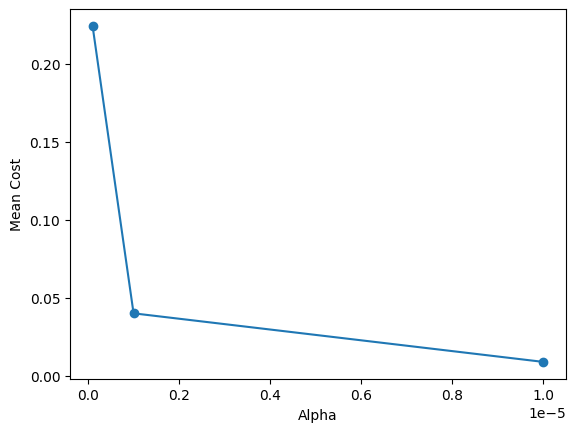

In [161]:
learning_rates=[1e-7, 1e-6, 1e-5]
hypertuning(learning_rates, 1, 0)

##### 1e-5 gives us highest mean R2 score. Taking this value as learning rate.

[0.009047706976267857, 0.009047706999808943, 0.00904770697626753, 0.009050061119392208, 0.009071248398058677]


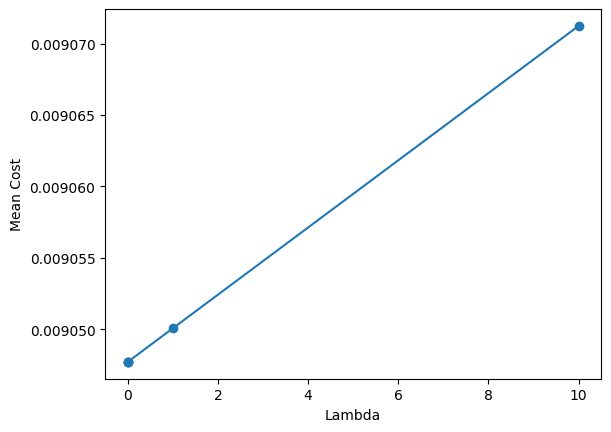

In [162]:
regularization_parameters=[1e-10, 1e-5, 0, 1, 10]
hypertuning(regularization_parameters, 0, 1)

##### No value of lambda affects our model to a significant extent. This implies that our objective is Linear Regression with no need of regularization.

## Gradient Descent Optimization

In [163]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

def GradientDescent(B, input=0, is_trained=0):
    
        
    no_of_iterations=100
    alpha=1e-5
    

    #Prepend X_test with a column of 1s
    no_of_rows, no_of_columns=X.shape
    X_ones=np.ones((no_of_rows, 1))
    X_with_ones=np.hstack((X_ones, X))


    if is_trained!=1:
        for iteration in range(0, no_of_iterations):
            
            new_B=[]
            for beta_index in range(0, len(B)):
                
                cost=0
                sum=0
                for row_index in range(0, no_of_rows):
                    
                    BX_sum=0
                    for i in range(0, len(B)):
                        BX_sum=BX_sum + B[i]*X_with_ones[row_index][i]                            
                    
                    cost=cost+ pow(Y[row_index]-BX_sum, 2)     
                    sum = sum + (BX_sum - Y[row_index]) * X_with_ones[row_index][beta_index]   
                
                cost=(1/(2*no_of_rows)) * cost

                new_B_val = B[beta_index] - (alpha/no_of_rows)*sum
                new_B.append(new_B_val)

            
            B=new_B

    #Calculate Y_predicted
    Y_predicted=np.matmul(X_with_ones, B)
    
    global r2_grad
    r2_grad=r2_score(Y,Y_predicted)
        
    if input==0:
        #print(f"Cost={cost}")
        print(f"R2 score after Gradient Descent={r2_grad}")
        x=list(range(1, len(Y)+1))
        plt.figure(figsize=(24, 12))
        plt.plot(x, Y, label="Actual")
        plt.plot(x, Y_predicted, color='orange', label="Predicted")
        plt.xlabel("Index")
        plt.ylabel("Chance")
        plt.title("Gradient Descent Optimization")
        plt.legend()
        plt.show()
        return
    
    input=np.hstack((1, input))
    output=np.matmul(B, input)
    return output
    
    
   

### Actual vs Predicted of both methods

R2 score of Least Squares Regression=0.766404899319947


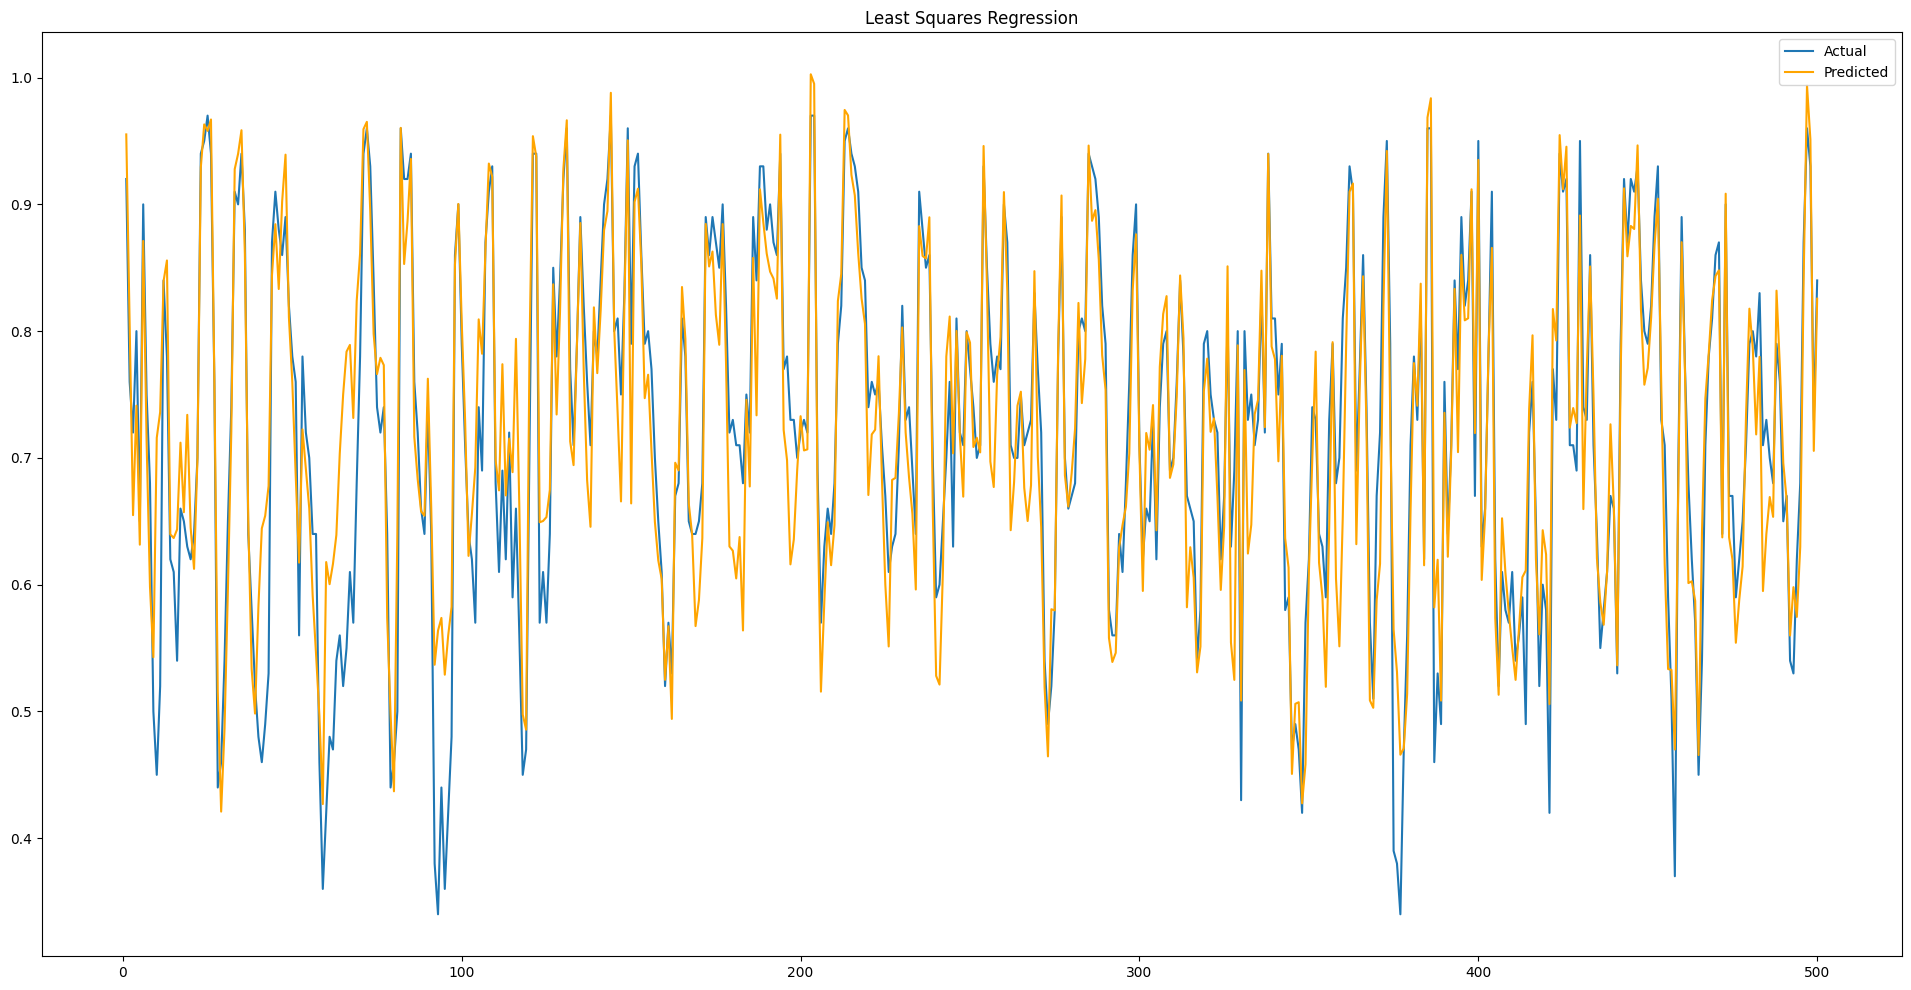

R2 score after Gradient Descent=0.8213645243327933


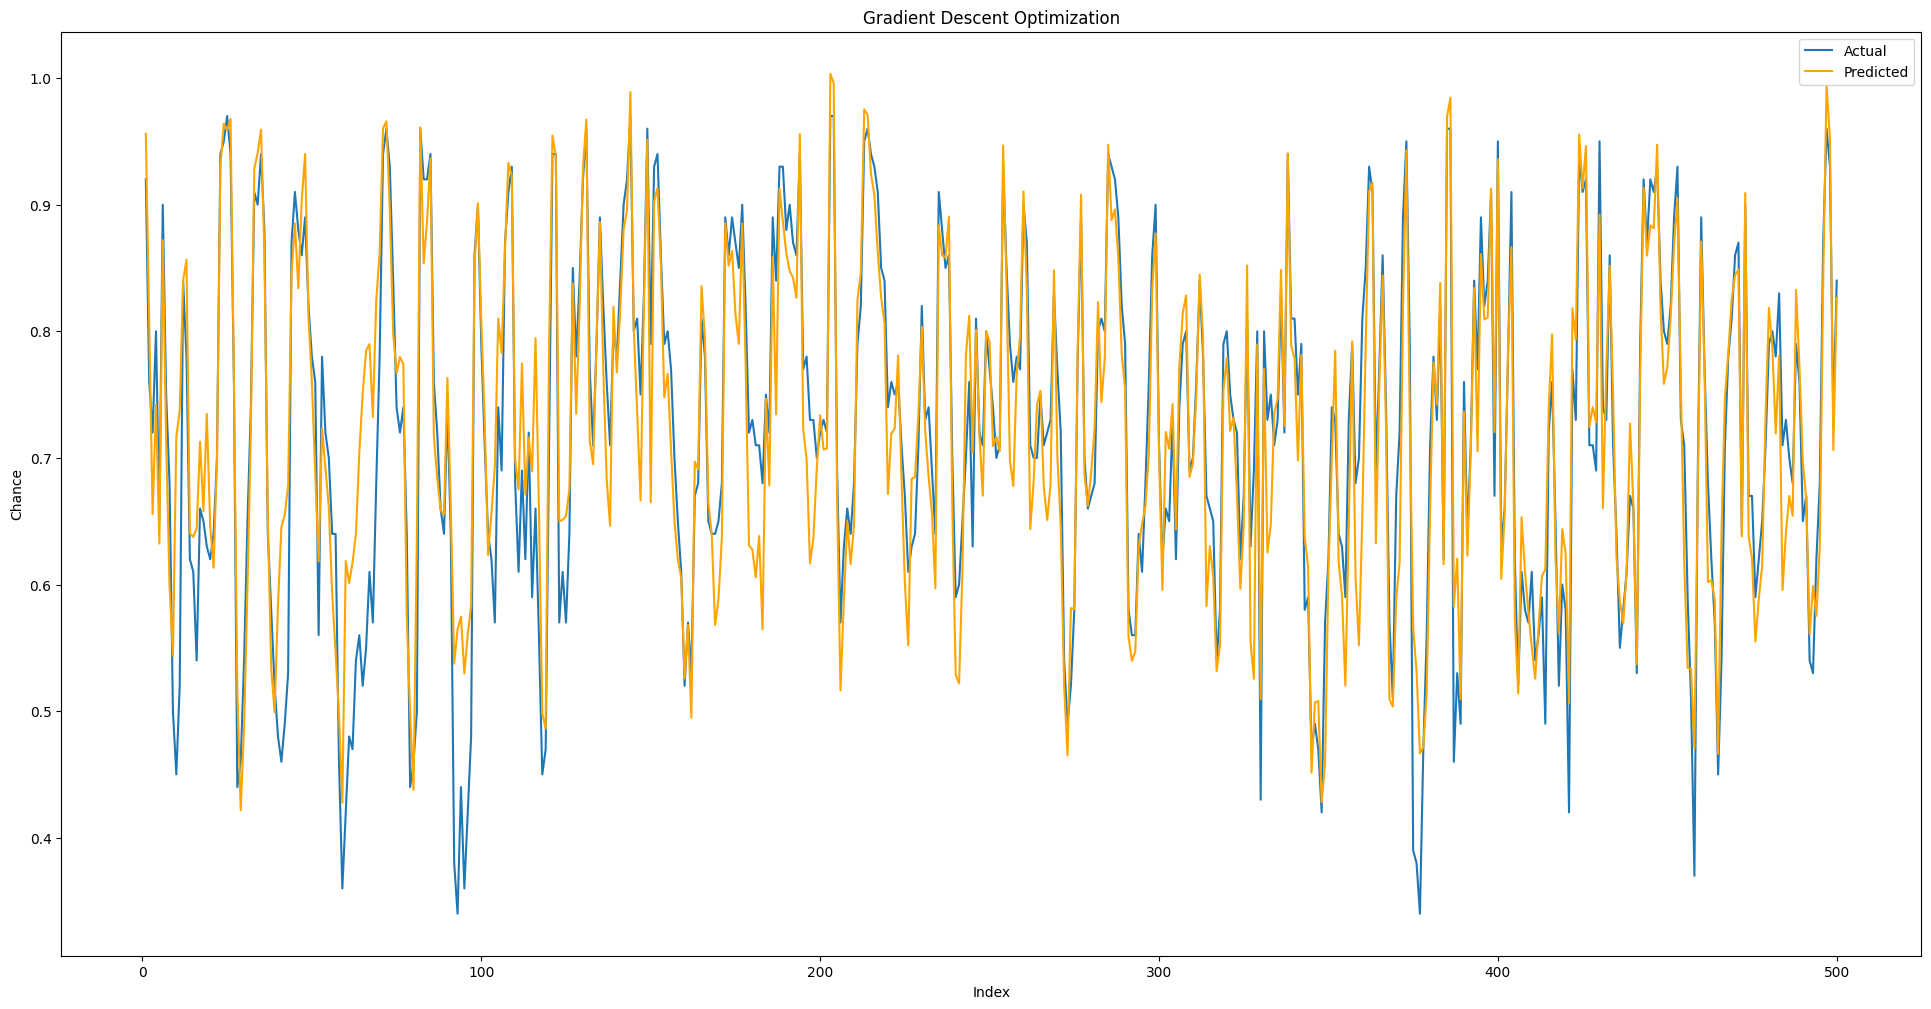

In [164]:
B=LeastSquaresError()
GradientDescent(B)

### Least Squares Error vs Gradient Descent R2 score

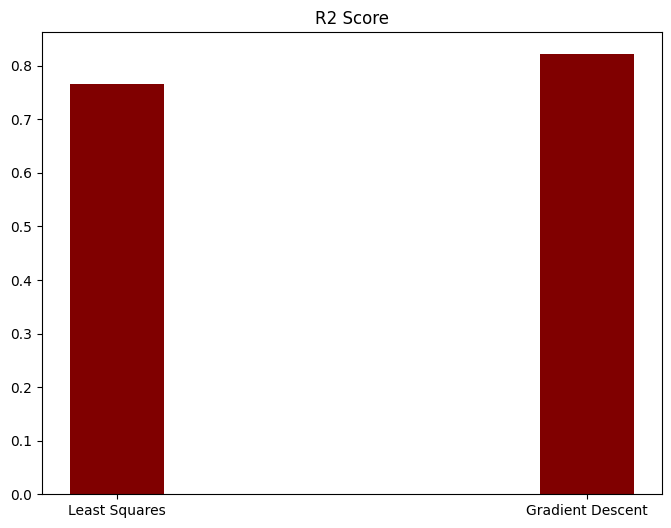

In [165]:
plt.figure(figsize=(8, 6))
# Dataframe to hold the results
model=['Least Squares', 'Gradient Descent']
R2_Score=[r2_least_sq, r2_grad]
plt.bar(model,R2_Score,color='Maroon',width=0.2)
plt.title("R2 Score")
plt.show()

# Input

In [166]:
is_trained=1
#GRE=input("Enter your GRE Score (out of 340)")
#TOEFL=input("Enter your TOEFL Score (out of 120)")
#Uni=input("Enter your University Rating (out of 5)")
#SOP=input("Statement of Purpose and Letter of Recommendation Strength ( out of 5 )")
#LOR=input("Enter LOR Grade (out of 5)")
#CGPA=input("Enter CGPA (out of 10)")
#Research=input("Enter Research Experience (0/1)")
#x=[GRE, TOEFL, Uni, SOP, LOR, CGPA, Research]

x=[320, 120, 2, 5, 5, 10, 1]
prob=GradientDescent(B, x, is_trained)
print(f"Probability that you will get admission={prob}")

print("\n")
x=[100, 60, 2, 4, 4, 10, 0]
prob=GradientDescent(B, x, is_trained)
print(f"Probability that you will get admission={prob}")

Probability that you will get admission=0.9639294166378886


Probability that you will get admission=0.28154572066198824
